# Hydrogen bonding in protein-ligand complexes

In this notebook we explore hydrogen bonding between ligands and proteins 

In [1]:
import openpharmacophore as oph

In [2]:
pdb_path = "../../data/3bbh_A_chain.pdb"

In [3]:
protein = oph.load(pdb_path)
print(f"Has hydrogens: {protein.has_hydrogens()}")
print(f"Has ligand: {protein.has_ligands()}")

Has hydrogens: False
Has ligand: True


In [4]:
lig_ids = protein.ligand_ids()
print(lig_ids)

['SFG:B']


In [5]:
smiles = oph.smiles_from_pdb_id(lig_ids[0])
smiles

'c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3)C[C@H](CC[C@@H](C(=O)O)N)N)O)O)N'

[13:45:41] WARNING: More than one matching pattern found - picking one



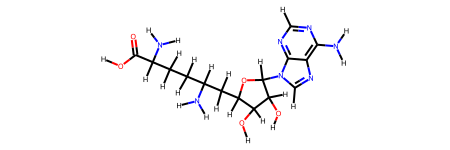

In [6]:
ligand = protein.get_ligand(lig_ids[0])
ligand.fix_bond_order(smiles=smiles)
ligand.add_hydrogens()

ligand.draw()

In [7]:
protein.remove_ligand(lig_ids[0])
print(f"Has ligand: {protein.has_ligands}")

Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fbd9e23a8d0>>


In [8]:
protein.add_hydrogens()
print(f"Protein has {protein.n_atoms} atoms after adding hydrogens")

Protein has 3455 atoms after adding hydrogens


In [9]:
bsite = oph.ComplexBindingSite(protein, ligand)

In [10]:
pharmacophore = oph.LigandReceptorPharmacophore(bsite, ligand)
pharmacophore.extract(feat_types=["hb acceptor", "hb donor"])

In [11]:
print(f"Number of pharmacophoric points {len(pharmacophore[0])}")
for p in pharmacophore[0]:
    print(p)

Number of pharmacophoric points 8
PharmacophoricPoint(feat_type=hb donor; center=(23.26, 62.8, 23.11); radius=1.0; direction=(-0.95, -0.06, -0.32))
PharmacophoricPoint(feat_type=hb donor; center=(28.92, 67.61, 28.62); radius=1.0; direction=(0.21, 0.7, 0.68))
PharmacophoricPoint(feat_type=hb donor; center=(28.92, 67.61, 28.62); radius=1.0; direction=(-0.12, 0.76, -0.63))
PharmacophoricPoint(feat_type=hb donor; center=(25.86, 60.01, 28.62); radius=1.0; direction=(0.18, 0.22, 0.96))
PharmacophoricPoint(feat_type=hb acceptor; center=(24.39, 64.99, 28.68); radius=1.0; direction=(0.45, 0.13, 0.88))
PharmacophoricPoint(feat_type=hb acceptor; center=(25.86, 60.01, 28.62); radius=1.0; direction=(-0.28, -0.86, -0.43))
PharmacophoricPoint(feat_type=hb acceptor; center=(29.65, 65.6, 29.93); radius=1.0; direction=(0.79, -0.04, 0.61))
PharmacophoricPoint(feat_type=hb acceptor; center=(27.07, 65.55, 26.9); radius=1.0; direction=(0.1, 0.57, -0.81))


In [12]:
viewer = oph.Viewer()
viewer.add_components([bsite, ligand, pharmacophore[0]])
view = viewer.show()
viewer.set_protein_style("ball+stick")
view

NGLWidget()

<img src="../../../../_static/hyd_bonds.png" alt="pharmacophore">
<div class="alert alert-info">
    <strong>Note:</strong>
    <p>viewer.show() displays an interactive widget. For simplicity an image is presented in the documentation.</p>
</div>

In [13]:
# Save view image so it can be viewed in the documentation
 
import time
import threading

save = False

def save_image(view):
    im = view.render_image()
    while not im.value:
        time.sleep(0.1)
    save_path = "../../../../_static/hyd_bonds.png"
    with open(save_path, "wb") as fp:
        fp.write(im.value)    

def generate_image():
    thread = threading.Thread(target=save_image, args=(viewer.to_nglview(),), daemon=True)
    thread.start()
    

if save:
    generate_image()